In [69]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

client_id = ######
client_secret = ######

username = ######
redirect_uri = #######

In this notebook I'm carrying out basic analytics on the Arctic Monkeys' discography to become familiar with how to use the Spotify API

# Top Tracks- Medium term

In [3]:
scope = 'user-top-read'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)
sp = spotipy.Spotify(auth=token)
results = sp.current_user_top_tracks(time_range='medium_term', limit=10)
for i, item in enumerate(results['items']):
    print(i+1, item['name'], '//', item['artists'][0]['name'])


1 Peep-Hole // Guided By Voices
2 Cooking // Duster
3 Long, Long, Long - Remastered 2009 // The Beatles
4 Trem De Doido // Lô Borges
5 Mequetrefe // Arca
6 Car // Built To Spill
7 This Night Has Opened My Eyes - 2011 Remaster // The Smiths
8 New Jersey // Red House Painters
9 West Virginia // Enablers
10 Tom Courtenay // Yo La Tengo


# Arctic Monkeys

In [4]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager )

In [51]:
def get_feature_history(uri:str,feature:str,stat):
    """Gets the value of certain audio features for an artists discography. The uri 
    parameter is the artist's spotify uri, the feature is what audio feature you want
    to view, the stat is how you want to represent the albums features; mean, max, min or
    standard deviation"""
    
    results = spotify.artist_albums(uri, album_type='album',limit=50)
    albums = results['items']
    albums_uri=[]
    albums_names=[]
    for i in albums:
        if "GB" in i['available_markets']:
            if i['name'] not in albums_names: #Stop Duplicates
                #print(i['name'])
                albums_names.append(i['name'])
                albums_uri.append(i['uri'])
                                
    feature_stat=np.zeros(len(albums_uri))

    for n in range(len(albums_uri)):
        track_results=spotify.album_tracks(albums_uri[n])
        tracks=track_results['items']
        track_features=[spotify.audio_features(p['id'])[0][feature] for p in tracks]
        if stat=="mean":
            feature_stat[n]=np.mean(track_features)
        elif stat=="max":
            feature_stat[n]=np.max(track_features)
        elif stat=="min":
            feature_stat[n]=np.min(track_features)
        elif stat=="std":
            feature_stat[n]=np.std(track_features)  
    return feature_stat

In [63]:
def get_album_release_dates(uri):
    results = spotify.artist_albums(uri, album_type='album',limit=50)
    albums = results['items']
    albums_release=[]
    albums_names=[]
    for i in albums:
        if "GB" in i['available_markets']:
            if i['name'] not in albums_names: #Stop Duplicates
                #print(i['name'])
                albums_names.append(i['name'])
                albums_release.append(datetime.datetime.strptime(i['release_date'], '%Y-%m-%d'))
    return albums_release

In [64]:
uri = 'spotify:artist:7Ln80lUS6He07XvHI8qqHH'
feature="danceability"
stat="mean"

AM_release_dates=get_album_release_dates(uri)
AM_dance=get_feature_history(uri,feature,stat)

Text(0.5, 1.0, 'Arctic Monkeys Album Mean Danceability Over Time')

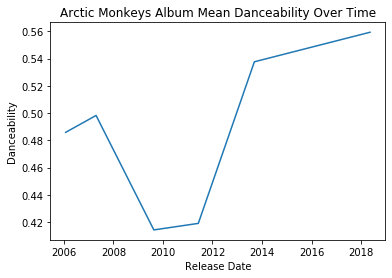

In [68]:
plt.plot(AM_release_dates,AM_dance)
plt.ylabel("Danceability")
plt.xlabel("Release Date")
plt.title("Arctic Monkeys Album Mean Danceability Over Time")

Arctic Monkeys' albums show a trend of increasing danceability over time with a big dip in the middle. The dip in the middle is expected as Humbug is a much darker and slower album than the rest and ,if you listen to the album, the tracks aren't particularly danceable. I had expected the album AM to have the highest danceability. It is probably the album with the widest mainstream appeal and the tracks have a lot more "groove" to them than previous albums. However, their latest album Tranquility Base Hotel & Casino comes out on top, it has less mainstream appeal but continues with the "groove" with a lot of the tracks having quite a lounge music feel and a lot of great basslines. A possible reason it comes out as more "danceable" as a whole than AM is that it is more consistent. AM has a few higher energy rock tracks like "R U Mine" or "Arabella" which may reduce the mean danceability. This is shown in the plot below where AM has a standard deviation of 0.12, compared to a standard deviation of 0.09 for TBH&C.

Of course the danceability stat can be seen as being slightly subjective as different people like to dance to different types of music. Some groups may see their debut as the best to dance to, but it suffers in its danceability stat here most likely due to its fast pace, high energy and being much more "rock music" than the later albums.

In [70]:
AM_dance_std=get_feature_history(uri,feature,"std")

Text(0.5, 1.0, 'Arctic Monkeys Album Danceability Standard Deviation Over Time')

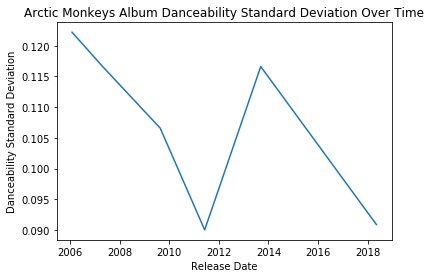

In [72]:
plt.plot(AM_release_dates,AM_dance_std)
plt.ylabel("Danceability Standard Deviation")
plt.xlabel("Release Date")
plt.title("Arctic Monkeys Album Danceability Standard Deviation Over Time")

Next I will look at how the energy of the albums changes over time

In [93]:
AM_energy=get_feature_history(uri,"energy",stat)

Text(0.5, 1.0, 'Arctic Monkeys Album Mean Energy Over Time')

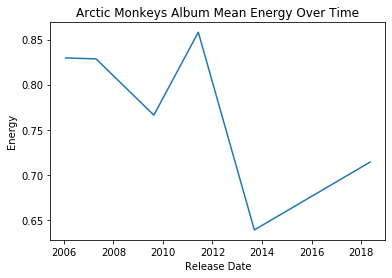

In [94]:
plt.plot(AM_release_dates,AM_energy)
plt.ylabel("Energy")
plt.xlabel("Release Date")
plt.title("Arctic Monkeys Album Mean Energy Over Time")

The results for energy are mostly as expected. The first 4 albums have a much higher energy in general with a slight dip for Humbug since, as previously mentioned, it was a lot darker and slower in parts, but it still is very "rock" and has high energy parts compared to albums like AM. What is surprising is that TBH&C has higher energy than AM, most of TBH&C seems very laid back and doesn't have the faster and rockier tracks like "R U Mine". However, the average energy of the tracks is higher by ~0.8. This may be explained by the tempo of the tracks, as tempo and energy are generally very closely linked. The plot below shows each albums mean tempo. TBH&C has a higher tempo on average than AM which may explain the slight difference in energy. This plot also confirms the idea that Humbug is a slower album than the rest with it having the 2nd lowest mean tempo, Am having the lowest mean tempo.

In [98]:
AM_tempo=get_feature_history(uri,"tempo",stat)

Text(0.5, 1.0, 'Arctic Monkeys Album Mean Tempo Over Time')

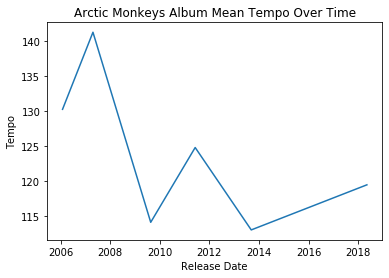

In [95]:
plt.plot(AM_release_dates,AM_tempo)
plt.ylabel("Tempo")
plt.xlabel("Release Date")
plt.title("Arctic Monkeys Album Mean Tempo Over Time")

Finally, I will compare the valence of the albums. Valence is described in the Spotify API documentation as "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track"

In [99]:
AM_valence=get_feature_history(uri,"valence",stat)

Text(0.5, 1.0, 'Arctic Monkeys Album Mean Valence Over Time')

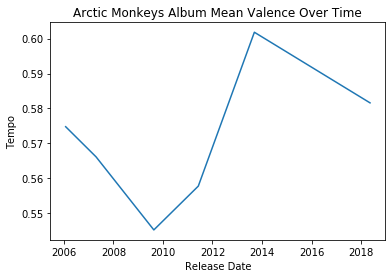

In [101]:
plt.plot(AM_release_dates,AM_valence)
plt.ylabel("Tempo")
plt.xlabel("Release Date")
plt.title("Arctic Monkeys Album Mean Valence Over Time")

This backs up my thoughts that Humbug is a "darker" album than the others and a lot more moody, with it having the lowest valence out of all the albums. AM has the highest valence. This may explain part of its widespread mainstream appeal with it becoming very popular in many countries, such as the USA. I feel that "happier" albums tend to have a wider appeal and do better in the charts. It would be interesting to see if the data backs this up, so that will be my next project with the Spotify API